In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score,precision_score, classification_report, confusion_matrix
import collections
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

np.random.seed(1337)  # for reproducibility

# Best Model evaluation

In [17]:
best_svm_clf = SVC(kernel = 'rbf', C = 14.1, gamma= 'scale', class_weight = 'balanced',probability=True)

In [18]:
best_svm_clf.fit(X_train, Y_train)

SVC(C=14.1, class_weight='balanced', probability=True)

In [19]:
Y_predict = best_svm_clf.predict(X_test)

In [20]:
accuracy_score(Y_test, Y_predict)

0.9407254653130288

# The number of correctly classified samples in the test set

In [21]:
accuracy_score(Y_test, Y_predict, normalize=False)

17791

# Confusion Matrix

In [22]:
conf_mx=confusion_matrix(Y_test, Y_predict)

In [23]:
conf_mx

array([[2363,    0,    0,    1,    0,    0,    0,    0],
       [   0, 2360,    0,    0,    4,    0,    0,    0],
       [   3,    0, 2332,   28,    0,    1,    0,    0],
       [  60,    0,   73, 1944,    3,  144,  140,    0],
       [   0,    1,    0,    0, 2363,    0,    0,    0],
       [   0,    0,    0,    0,    0, 2244,  120,    0],
       [   0,    0,    1,    2,    0,  396, 1965,    0],
       [   0,    0,    0,    0,  144,    0,    0, 2220]], dtype=int64)

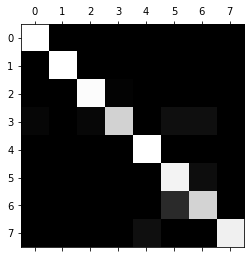

In [24]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

# Classification Error plot

In [25]:
row_sums=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx=conf_mx/row_sums

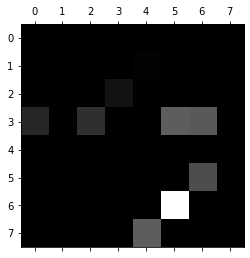

In [26]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

# Precision vs. Recall curve

In [28]:
Y_score = best_svm_clf.predict_proba(X_test)

In [29]:
Y_test_bin= label_binarize(Y_test, classes=[*range(no_of_classes)])

In [1]:
precision = dict()
recall = dict()
x=range(no_of_classes)
print(x)
for i in range(no_of_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test_bin[:,i],Y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

NameError: name 'no_of_classes' is not defined

# ROC curve

range(0, 8)


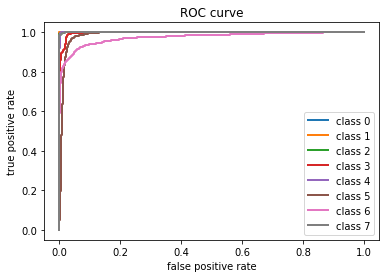

In [31]:
fpr = dict()
tpr = dict()
x=range(no_of_classes)
print(x)
for i in range(no_of_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i],Y_score[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()